In [1]:
import pandas as pd
import numpy as np

In [5]:
import pandas as pd

# 读取CSV文件，指定分隔符为分号
df = pd.read_csv("/Users/wenqing_liu/Desktop/bodyfat.csv", sep=';')
df


,siri,age,weight,height,neck,chest,abdomen,hip,thigh,knee,ankle,biceps,forearm,wrist
0,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


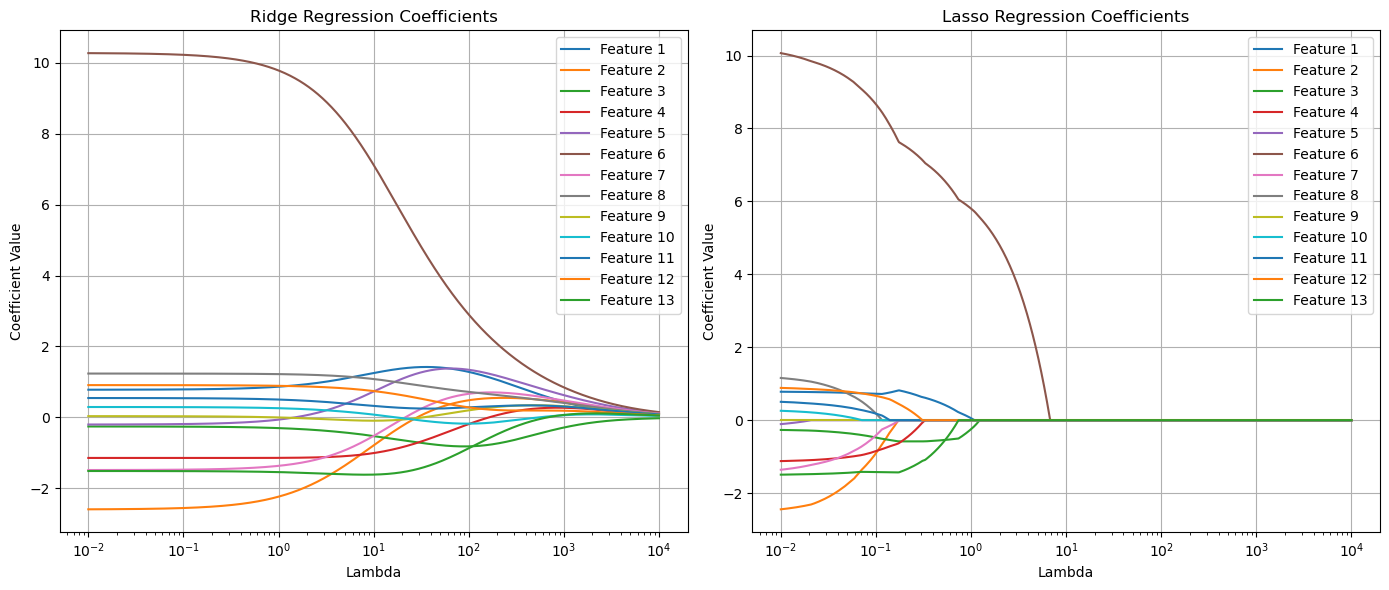

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop(columns=['siri'])  # 保留所有特征，不删除其他列
y = df['siri']

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 创建一系列的 λ 值
lambda_seq = np.logspace(4, -2, 1000)

# 储存系数
ridge_coefs = []
lasso_coefs = []

# 执行岭回归和套索回归
for lmbda in lambda_seq:
    ridge = Ridge(alpha=lmbda)
    ridge.fit(X_scaled, y)
    ridge_coefs.append(ridge.coef_)

    lasso = Lasso(alpha=lmbda)
    lasso.fit(X_scaled, y)
    lasso_coefs.append(lasso.coef_)

# 转换为数组
ridge_coefs = np.array(ridge_coefs)
lasso_coefs = np.array(lasso_coefs)

# 绘制系数值随 λ 的变化图
plt.figure(figsize=(14, 6))

# 岭回归系数图
plt.subplot(1, 2, 1)
for i in range(ridge_coefs.shape[1]):
    plt.plot(lambda_seq, ridge_coefs[:, i], label=f'Feature {i+1}')
plt.xscale('log')
plt.title('Ridge Regression Coefficients')
plt.xlabel('Lambda')
plt.ylabel('Coefficient Value')
plt.legend()
plt.grid()

# 套索回归系数图
plt.subplot(1, 2, 2)
for i in range(lasso_coefs.shape[1]):
    plt.plot(lambda_seq, lasso_coefs[:, i], label=f'Feature {i+1}')
plt.xscale('log')
plt.title('Lasso Regression Coefficients')
plt.xlabel('Lambda')
plt.ylabel('Coefficient Value')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


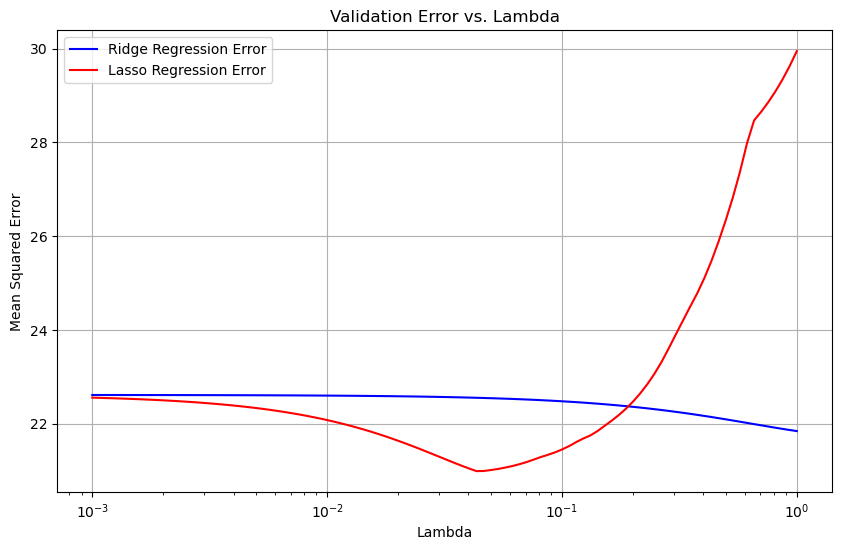

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 设置随机种子
np.random.seed(1)

# 随机选择152个样本作为训练集
train_indices = np.random.choice(range(len(df)), size=152, replace=False)
X_train = X_scaled[train_indices]
y_train = y.iloc[train_indices]

# 剩余样本作为验证集
validation_indices = np.setdiff1d(range(len(df)), train_indices)
X_validation = X_scaled[validation_indices]
y_validation = y.iloc[validation_indices]

# 创建 λ 值序列
lambda_seq = np.logspace(0, -3, 100)

# 储存验证错误
ridge_errors = []
lasso_errors = []

# 评估岭回归和套索回归
for lmbda in lambda_seq:
    ridge = Ridge(alpha=lmbda)
    ridge.fit(X_train, y_train)
    ridge_errors.append(np.mean((ridge.predict(X_validation) - y_validation) ** 2))  # 均方误差

    lasso = Lasso(alpha=lmbda)
    lasso.fit(X_train, y_train)
    lasso_errors.append(np.mean((lasso.predict(X_validation) - y_validation) ** 2))  # 均方误差

# 绘制验证错误图
plt.figure(figsize=(10, 6))
plt.plot(lambda_seq, ridge_errors, label='Ridge Regression Error', color='blue')
plt.plot(lambda_seq, lasso_errors, label='Lasso Regression Error', color='red')
plt.xscale('log')
plt.title('Validation Error vs. Lambda')
plt.xlabel('Lambda')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid()
plt.show()


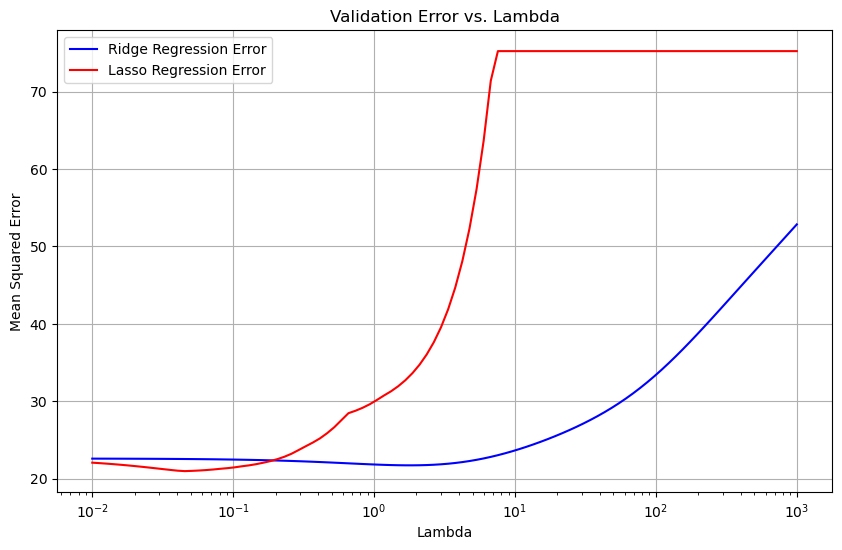

Optimal Ridge Lambda: 1.873817422860385
Minimum Ridge MSE: 21.734113754332665
Optimal Lasso Lambda: 0.04534878508128582
Minimum Lasso MSE: 20.98601990587815


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 设置随机种子
np.random.seed(1)

# 随机选择152个样本作为训练集
train_indices = np.random.choice(range(len(df)), size=152, replace=False)
X_train = X_scaled[train_indices]
y_train = y.iloc[train_indices]

# 剩余样本作为验证集
validation_indices = np.setdiff1d(range(len(df)), train_indices)
X_validation = X_scaled[validation_indices]
y_validation = y.iloc[validation_indices]

# 创建 λ 值序列
lambda_seq = np.logspace(3, -2, 100)

# 储存验证错误
ridge_errors = []
lasso_errors = []

# 评估岭回归和套索回归
for lmbda in lambda_seq:
    ridge = Ridge(alpha=lmbda)
    ridge.fit(X_train, y_train)
    ridge_pred = ridge.predict(X_validation)
    ridge_errors.append(mean_squared_error(y_validation, ridge_pred))  # 均方误差

    lasso = Lasso(alpha=lmbda)
    lasso.fit(X_train, y_train)
    lasso_pred = lasso.predict(X_validation)
    lasso_errors.append(mean_squared_error(y_validation, lasso_pred))  # 均方误差

# 找到最小的 MSE 及其对应的 λ
min_ridge_mse_index = np.argmin(ridge_errors)
min_lasso_mse_index = np.argmin(lasso_errors)

optimal_ridge_lambda = lambda_seq[min_ridge_mse_index]
optimal_lasso_lambda = lambda_seq[min_lasso_mse_index]

# 绘制验证错误图
plt.figure(figsize=(10, 6))
plt.plot(lambda_seq, ridge_errors, label='Ridge Regression Error', color='blue')
plt.plot(lambda_seq, lasso_errors, label='Lasso Regression Error', color='red')

plt.xscale('log')
plt.title('Validation Error vs. Lambda')
plt.xlabel('Lambda')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid()
plt.show()

# 输出最优 λ 和最小 MSE
print(f'Optimal Ridge Lambda: {optimal_ridge_lambda}')
print(f'Minimum Ridge MSE: {ridge_errors[min_ridge_mse_index]}')
print(f'Optimal Lasso Lambda: {optimal_lasso_lambda}')
print(f'Minimum Lasso MSE: {lasso_errors[min_lasso_mse_index]}')


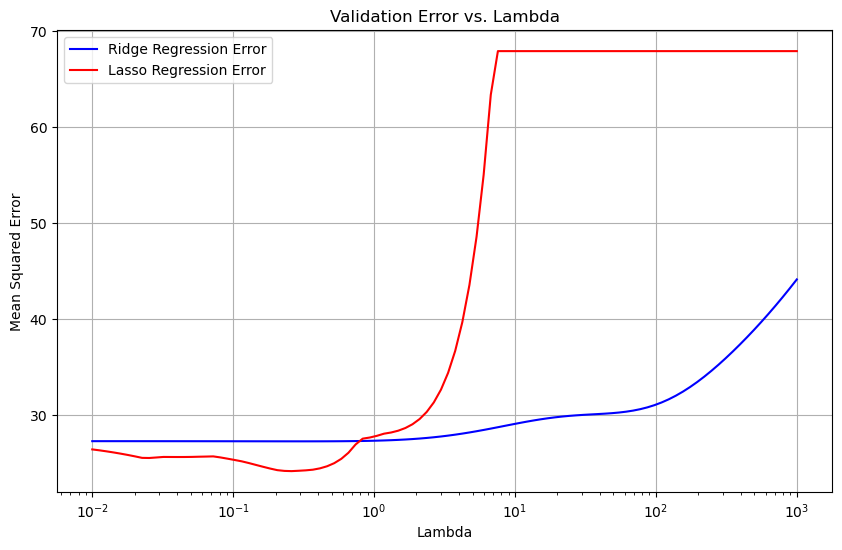

Optimal Ridge Lambda: 0.2915053062825176
Minimum Ridge MSE: 27.26900838367148
Optimal Lasso Lambda: 0.25950242113997374
Minimum Lasso MSE: 24.16400978092616


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 设置随机种子
np.random.seed(5)

# 随机选择152个样本作为训练集
train_indices = np.random.choice(range(len(df)), size=152, replace=False)
X_train = X_scaled[train_indices]
y_train = y.iloc[train_indices]

# 剩余样本作为验证集
validation_indices = np.setdiff1d(range(len(df)), train_indices)
X_validation = X_scaled[validation_indices]
y_validation = y.iloc[validation_indices]

# 创建 λ 值序列
lambda_seq = np.logspace(3, -2, 100)

# 储存验证错误
ridge_errors = []
lasso_errors = []

# 评估岭回归和套索回归
for lmbda in lambda_seq:
    ridge = Ridge(alpha=lmbda)
    ridge.fit(X_train, y_train)
    ridge_pred = ridge.predict(X_validation)
    ridge_errors.append(mean_squared_error(y_validation, ridge_pred))  # 均方误差

    lasso = Lasso(alpha=lmbda)
    lasso.fit(X_train, y_train)
    lasso_pred = lasso.predict(X_validation)
    lasso_errors.append(mean_squared_error(y_validation, lasso_pred))  # 均方误差

# 找到最小的 MSE 及其对应的 λ
min_ridge_mse_index = np.argmin(ridge_errors)
min_lasso_mse_index = np.argmin(lasso_errors)

optimal_ridge_lambda = lambda_seq[min_ridge_mse_index]
optimal_lasso_lambda = lambda_seq[min_lasso_mse_index]

# 绘制验证错误图
plt.figure(figsize=(10, 6))
plt.plot(lambda_seq, ridge_errors, label='Ridge Regression Error', color='blue')
plt.plot(lambda_seq, lasso_errors, label='Lasso Regression Error', color='red')

plt.xscale('log')
plt.title('Validation Error vs. Lambda')
plt.xlabel('Lambda')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid()
plt.show()

# 输出最优 λ 和最小 MSE
print(f'Optimal Ridge Lambda: {optimal_ridge_lambda}')
print(f'Minimum Ridge MSE: {ridge_errors[min_ridge_mse_index]}')
print(f'Optimal Lasso Lambda: {optimal_lasso_lambda}')
print(f'Minimum Lasso MSE: {lasso_errors[min_lasso_mse_index]}')


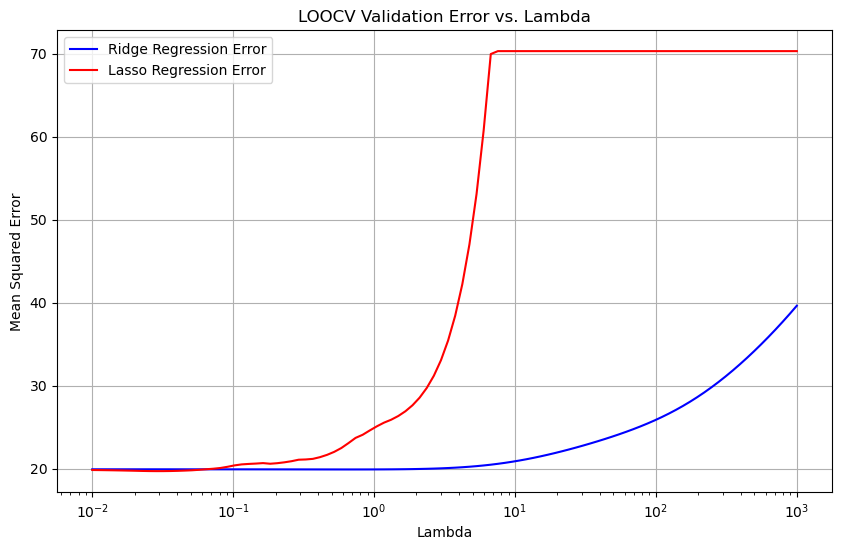

Optimal Ridge Lambda: 0.6579332246575682
Minimum Ridge MSE: 19.893446782332095
Optimal Lasso Lambda: 0.028480358684358047
Minimum Lasso MSE: 19.69268992089304


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeaveOneOut


# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 创建 λ 值序列
lambda_seq = np.logspace(3, -2, 100)

# 储存验证错误
ridge_errors = np.zeros(len(lambda_seq))
lasso_errors = np.zeros(len(lambda_seq))

# LOOCV
loo = LeaveOneOut()

for idx, lmbda in enumerate(lambda_seq):
    ridge_mse = []
    lasso_mse = []
    
    for train_index, test_index in loo.split(X_scaled):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # 岭回归
        ridge = Ridge(alpha=lmbda)
        ridge.fit(X_train, y_train)
        ridge_pred = ridge.predict(X_test)
        ridge_mse.append(mean_squared_error(y_test, ridge_pred))

        # 套索回归
        lasso = Lasso(alpha=lmbda)
        lasso.fit(X_train, y_train)
        lasso_pred = lasso.predict(X_test)
        lasso_mse.append(mean_squared_error(y_test, lasso_pred))

    # 计算当前 λ 的平均 MSE
    ridge_errors[idx] = np.mean(ridge_mse)
    lasso_errors[idx] = np.mean(lasso_mse)

# 找到最小的 MSE 及其对应的 λ
min_ridge_mse_index = np.argmin(ridge_errors)
min_lasso_mse_index = np.argmin(lasso_errors)

optimal_ridge_lambda = lambda_seq[min_ridge_mse_index]
optimal_lasso_lambda = lambda_seq[min_lasso_mse_index]

# 绘制验证错误图
plt.figure(figsize=(10, 6))
plt.plot(lambda_seq, ridge_errors, label='Ridge Regression Error', color='blue')
plt.plot(lambda_seq, lasso_errors, label='Lasso Regression Error', color='red')

plt.xscale('log')
plt.title('LOOCV Validation Error vs. Lambda')
plt.xlabel('Lambda')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid()
plt.show()

# 输出最优 λ 和最小 MSE
print(f'Optimal Ridge Lambda: {optimal_ridge_lambda}')
print(f'Minimum Ridge MSE: {ridge_errors[min_ridge_mse_index]}')
print(f'Optimal Lasso Lambda: {optimal_lasso_lambda}')
print(f'Minimum Lasso MSE: {lasso_errors[min_lasso_mse_index]}')


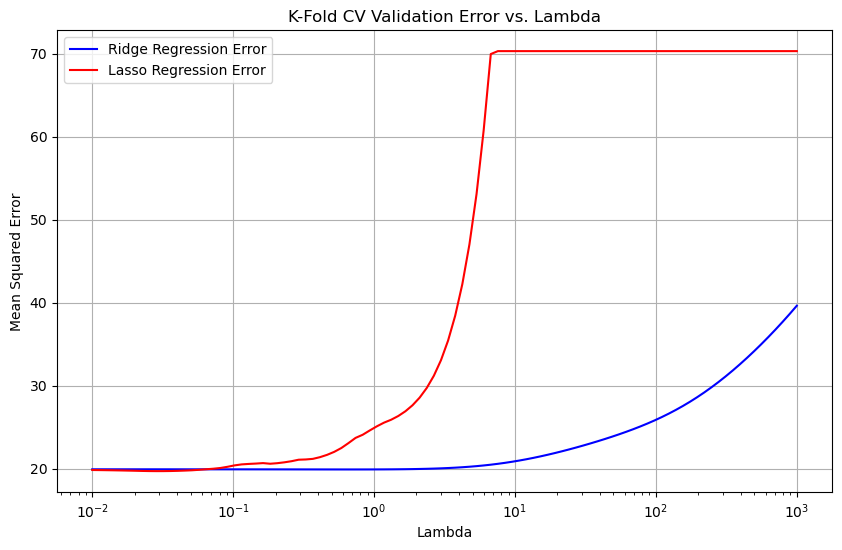

Optimal Ridge Lambda: 0.6579332246575682
Minimum Ridge MSE: 19.893446782332095
Optimal Lasso Lambda: 0.028480358684358047
Minimum Lasso MSE: 19.69268992089304


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold


# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 创建 λ 值序列
lambda_seq = np.logspace(3, -2, 100)

# 储存验证错误
ridge_errors = np.zeros(len(lambda_seq))
lasso_errors = np.zeros(len(lambda_seq))

# K-fold CV
K = len(df)  # 设置 K 值
kf = KFold(n_splits=K, shuffle=True, random_state=1)  # 随机分割数据

for idx, lmbda in enumerate(lambda_seq):
    ridge_mse = []
    lasso_mse = []
    
    for train_index, test_index in kf.split(X_scaled):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # 岭回归
        ridge = Ridge(alpha=lmbda)
        ridge.fit(X_train, y_train)
        ridge_pred = ridge.predict(X_test)
        ridge_mse.append(mean_squared_error(y_test, ridge_pred))

        # 套索回归
        lasso = Lasso(alpha=lmbda)
        lasso.fit(X_train, y_train)
        lasso_pred = lasso.predict(X_test)
        lasso_mse.append(mean_squared_error(y_test, lasso_pred))

    # 计算当前 λ 的平均 MSE
    ridge_errors[idx] = np.mean(ridge_mse)
    lasso_errors[idx] = np.mean(lasso_mse)

# 找到最小的 MSE 及其对应的 λ
min_ridge_mse_index = np.argmin(ridge_errors)
min_lasso_mse_index = np.argmin(lasso_errors)

optimal_ridge_lambda = lambda_seq[min_ridge_mse_index]
optimal_lasso_lambda = lambda_seq[min_lasso_mse_index]

# 绘制验证错误图
plt.figure(figsize=(10, 6))
plt.plot(lambda_seq, ridge_errors, label='Ridge Regression Error', color='blue')
plt.plot(lambda_seq, lasso_errors, label='Lasso Regression Error', color='red')

plt.xscale('log')
plt.title('K-Fold CV Validation Error vs. Lambda')
plt.xlabel('Lambda')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid()
plt.show()

# 输出最优 λ 和最小 MSE
print(f'Optimal Ridge Lambda: {optimal_ridge_lambda}')
print(f'Minimum Ridge MSE: {ridge_errors[min_ridge_mse_index]}')
print(f'Optimal Lasso Lambda: {optimal_lasso_lambda}')
print(f'Minimum Lasso MSE: {lasso_errors[min_lasso_mse_index]}')
